
## K-Means Clustering
The `sklearn` function `Kmeans()` performs K-means clustering in R. We begin with
a simple simulated example in which there truly are two clusters in the
data: the first 25 observations have a mean shift relative to the next 25
observations.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

/Users/enayat/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Example 1:
In this example, we are going to first generate 2D dataset containing 4 different blobs and after that will apply k-means algorithm to see the result.

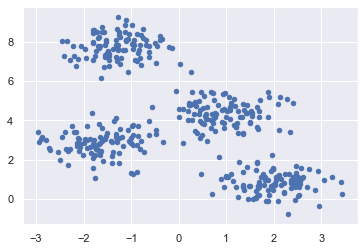

In [8]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

#### Using elbow method to find the number of clusters

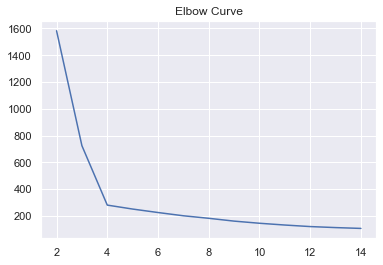

In [9]:
#Converting ret_var into numpy array
sse = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    #SSE for each n_clusters
    sse.append(kmeans.inertia_) 
 
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

Next, make an object of KMeans along with providing number of clusters, train the model and do the prediction as follows −

In [10]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Now, with the help of following code we can plot and visualize the cluster’s centers picked by k-means Python estimator −

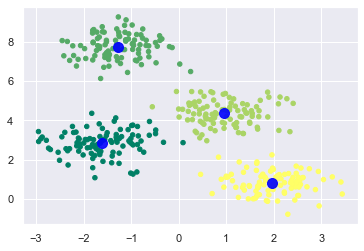

In [13]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()


### Example 2
Let us move to another example in which we are going to apply K-means clustering on simple digits dataset. K-means will try to identify similar digits without using the original label information.

First, we will start by importing the necessary packages −



In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

Next, load the digit dataset from sklearn and make an object of it. We can also find number of rows and columns in this dataset as follows −


In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The above output shows that this dataset is having 1797 samples with 64 features.

We can perform the clustering as we did in Example 1 above −


In [16]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The above output shows that K-means created 10 clusters with 64 features.

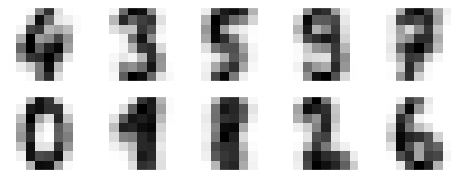

In [18]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

The following lines of code will match the learned cluster labels with the true labels found in them −
and then we can check the accuracy −


In [19]:

from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
   mask = (clusters == i)
   labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.7935447968836951